In [37]:
from keras.datasets import mnist 
# from mnist.loader import MNIST

In [38]:
import matplotlib.pyplot as plt #For visualizing the hand-written images
%matplotlib inline

In [39]:
(X_train,y_train),(x_test,y_test) = mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
x_test.shape

(10000, 28, 28)

y_test.shape

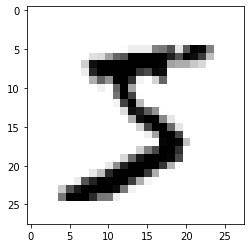

In [42]:
plt.imshow(X_train[0],cmap = 'gray_r')

In [43]:
from keras.utils.np_utils import to_categorical

In [44]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [45]:
y_cat_test.shape

(10000, 10)

In [46]:
#Processing the X_data or the featured data
print(X_train[0].max())
print(x_test[0].max())
#Standardizing the X_data(Normalizing)
X_train = X_train/X_train.max()
x_test = x_test/x_test.max()

print(x_test[0].max())
print(X_train[0].max())

255
255
1.0
1.0


In [47]:
X_train = X_train.reshape((60000, 28, 28,1))
X_train.shape


(60000, 28, 28, 1)

In [48]:
x_test = x_test.reshape((10000, 28, 28,1))
x_test.shape


(10000, 28, 28, 1)

In [54]:
#Building the neural network

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model = Sequential()

#Convolutional layer
model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (28, 28, 1),activation='relu',))

#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

#Flattening 2D image --> 1D image
model.add(Flatten())

#Now,adding the Dense layers
model.add(Dense(128,activation = 'relu'))

#Output layer
model.add(Dense(10,activation = 'softmax'))




In [57]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [58]:


model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train,y_cat_train,epochs = 2) 

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1367 - accuracy: 0.9580
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9853


In [64]:
#Evaluating the model 
from sklearn.metrics import classification_report

model.metrics_names

['loss', 'accuracy']

In [65]:
model.evaluate(x_test,y_cat_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0415 - accuracy: 0.9860


[0.04150243103504181, 0.9860000014305115]

In [66]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

